In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import os
import cv2 as cv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
datadir_train = "/content/drive/MyDrive/Final_AI/Data/Train"
categories = ['HuuChau','LanNgoc','NgocGiau','SonTung','ThanhLoc','ThuyNgan','TocTien','TranThanh','TruongGiang','VietHuong']
img_size = 200

#Create training data:
training_data=[]
def create_traning_data():
  for category in categories:
    path = os.path.join(datadir_train,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array =cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 154/154 [00:01<00:00, 87.71it/s] 

1764


In [ ]:
datadir_test = "/content/drive/MyDrive/Final_AI/Data/Test"
categories = ['HuuChau','LanNgoc','NgocGiau','SonTung','ThanhLoc','ThuyNgan','TocTien','TranThanh','TruongGiang','VietHuong']
img_size = 200

#Create testing data:
testing_data=[]
def create_testing_data():
  for category in categories:
    path = os.path.join(datadir_test,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array =cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        testing_data.append([new_array,class_num])
      except Exception as e:
        pass
create_testing_data()
print(len(testing_data))

100%|██████████| 76/76 [00:20<00:00,  3.75it/s]

640


In [ ]:
#saving (x:features), (y:label)
#Train
x_train=[]
y_train=[]
for features, label in training_data :
 x_train.append(features)
 y_train.append(label)
x_train=np.array(x_train).reshape(-1,img_size,img_size,1)
y_train=np.array(y_train)
print('x train',x_train.shape)
print('y train',y_train.shape)

#Test
x_test=[]
y_test=[]
for features, label in testing_data :
 x_test.append(features)
 y_test.append(label)
x_test=np.array(x_test).reshape(-1,img_size,img_size,1)
y_test=np.array(y_test)
print('x test',x_test.shape)
print('y test',y_test.shape)

x train (1764, 200, 200, 1)
y train (1764,)
x test (640, 200, 200, 1)
y test (640,)


In [ ]:
#saving x train, x test, y train, y test as file.pickle into drive
pickle_out = open("/content/drive/MyDrive/Final_AI/Save/x_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Final_AI/Save/x_test.pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Final_AI/Save/y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Final_AI/Save/y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, LeakyReLU
from keras.optimizers import Adam

pickle_in = open("/content/drive/MyDrive/Final_AI/Save/x_train.pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Final_AI/Save/x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Final_AI/Save/y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Final_AI/Save/y_test.pickle","rb")
y_test = pickle.load(pickle_in)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
print('X train',x_train.shape)
print('X test',x_test.shape)

from keras.utils import to_categorical #ONE HOT ENCODING
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)
print('Y train',y_train.shape)
print('Y test',y_test.shape)

X train (1764, 200, 200, 1)
X test (640, 200, 200, 1)
Y train (1764, 10)
Y test (640, 10)


In [ ]:
model=Sequential()

#layer
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu',
                 input_shape = (img_size,img_size,1),
                 padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D((2,2),padding = 'same'))
model.add(Dropout(0.1))

#layer
model.add(Conv2D(64,(3,3), activation = 'relu',
                 padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D((2,2),padding = 'same'))
model.add(Dropout(0.1))

#layer
model.add(Conv2D(128,(3,3), activation = 'relu',
                 padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D((2,2),padding = 'same'))
model.add(Dropout(0.1))

#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation = 'softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),
              metrics = ['accuracy'])
model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 100, verbose = 1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                        

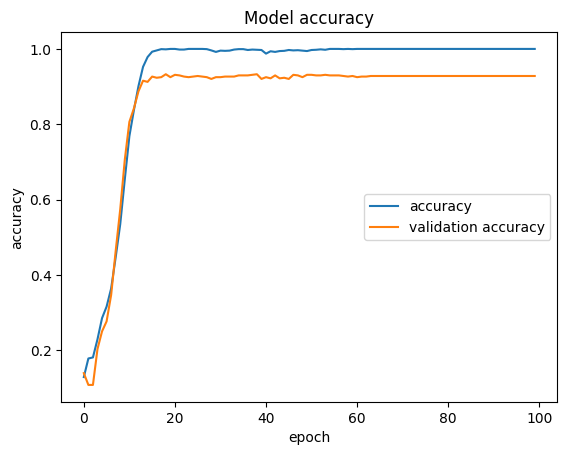

In [ ]:
l1 = plt.plot(history.history['accuracy'],label = 'accuracy')
l2 = plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.show()

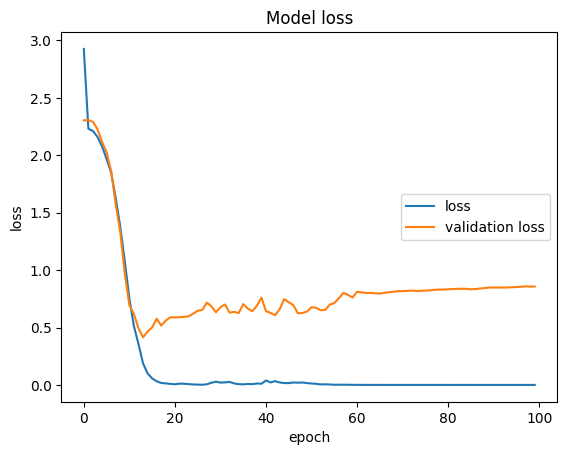

In [ ]:
l3 = plt.plot(history.history['loss'],label = 'loss')
l4 = plt.plot(history.history['val_loss'],label = 'validation loss')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.show()

In [ ]:
model.save('Final_AI.h5')

In [ ]:
from keras.models import load_model
from keras.utils import load_img,img_to_array
model_final = load_model('/content/Final_AI.h5')

In [ ]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(img_size, img_size))
    return img

labels = {0:'Huu Chau',
          1:'Ninh Duong Lan Ngoc',
          2:'Ngoc Giau',
          3:'Son Tung M-TP',
          4:'Thanh Loc',
          5:'Thuy Ngan',
          6:'Toc Tien',
          7:'Tran Thanh',
          8:'Truong Giang',
          9:'Viet Huong' }

1/1 [==============================] - 0s 23ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation:  Ninh Duong Lan Ngoc


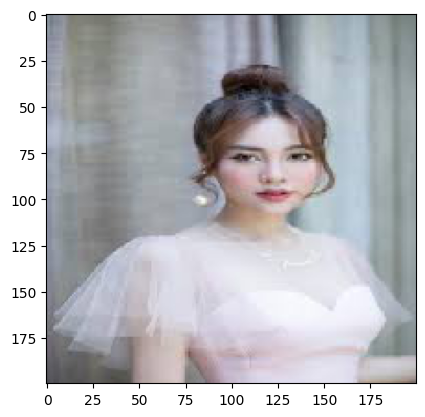

In [ ]:
#load img and test:
img = load_image('/content/drive/MyDrive/Final_AI/Data/Test/LanNgoc/images (20).jfif')
plt.imshow(img)
img = img_to_array(img)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,img_size,img_size,1)
result = model_final.predict(img)
print(result)
np.argmax(result)
print('expectation: ',labels[np.argmax(result)])